In [1]:
import gym
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

print(np.identity(16))

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [2]:
env = gym.make('FrozenLake-v0')
input_size = env.observation_space.n
output_size = env.action_space.n
learning_rate = 0.1
print(input_size)
X= tf.placeholder(shape=[1, input_size], dtype=tf.float32)
W = tf.Variable(tf.random_uniform([input_size, output_size], 0, 0.01))

Qpred = tf.matmul(X, W)
Y = tf.placeholder(shape=[1, output_size], dtype=tf.float32)

loss = tf.reduce_sum(tf.square(Y - Qpred))
train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)

dis = 0.99
num_episodes = 2000

rList = []

def one_hot(x) :
    return np.eye(input_size)[x:x+1]

16


In [3]:
init = tf.global_variables_initializer()
with tf.Session() as sess :
    sess.run(init) # initialize
    for i in range(num_episodes):
        s = env.reset()
        e = 1. / ((i /50) + 10)
        rAll = 0
        done = False
        local_loss = []
        # Random action
        while not done:
            Qs = sess.run(Qpred, feed_dict = {X: one_hot(s)})
            if np.random.rand(1) < e:
                a = env.action_space.sample()
            else:
                a = np.argmax(Qs)
                
            #get reward
            s1, reward, done, _ = env.step(a)
            if done:
                Qs[0, a] = reward
            else :
                # next state
                Qs1 = sess.run(Qpred, feed_dict={X: one_hot(s1)})
                Qs[0, a] = reward + dis * np.max(Qs1)
            sess.run(train, feed_dict={X: one_hot(s), Y: Qs})
            
            rAll += reward
            s = s1
        rList.append(rAll)

Percentage of successful episodes: 0.481%


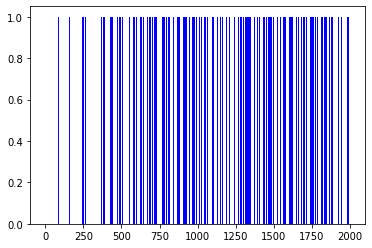

In [4]:
print('Percentage of successful episodes: ' + str(sum(rList)/num_episodes) + '%')
plt.bar(range(len(rList)), rList, color="blue")
plt.show()